# National Park Trail Analysis
Springboard Capstone 1

Evan Hintz

In [1]:
#data manipulating/organizing and plotting
import pandas as pd
import pandas.plotting
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#stats packages
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
import numpy as np

In [3]:
#Machine learning packages
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import preprocessing, svm, metrics, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
#import dataset
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv(r'C:\Users\Evan\Programming\Jupiter Projects\NatPark Capstone\Trail Data\AllTrails data - nationalpark.csv')

#create a dataframe that won't be altered at all for any kind of necessary testing
og_df = pd.read_csv(r'C:\Users\Evan\Programming\Jupiter Projects\NatPark Capstone\Trail Data\AllTrails data - nationalpark.csv')

df.head(3)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'waterfall', 'wild-flowers', 'wildlife']","['birding', 'camping', 'hiking', 'nature-trips', 'trail-running']",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers', 'wildlife']","['birding', 'camping', 'hiking', 'nature-trips', 'walking']",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildlife']","['hiking', 'walking']",i


# Clean and reorganize data for analysis

Check for any missing values within the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
trail_id             3313 non-null int64
name                 3313 non-null object
area_name            3313 non-null object
city_name            3313 non-null object
state_name           3313 non-null object
country_name         3313 non-null object
_geoloc              3313 non-null object
popularity           3313 non-null float64
length               3313 non-null float64
elevation_gain       3313 non-null float64
difficulty_rating    3313 non-null int64
route_type           3313 non-null object
visitor_usage        3060 non-null float64
avg_rating           3313 non-null float64
num_reviews          3313 non-null int64
features             3313 non-null object
activities           3313 non-null object
units                3313 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 466.0+ KB


The only visible 'False' value is under 'visitor_usage'. 

Visitor usage seems to be the only column with any missing values (253 rows). Since this is only about 7.6% of the data the 253 rows will be omitted.

In [6]:
df = df.dropna()
df.info()
#left with 3060 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3312
Data columns (total 18 columns):
trail_id             3060 non-null int64
name                 3060 non-null object
area_name            3060 non-null object
city_name            3060 non-null object
state_name           3060 non-null object
country_name         3060 non-null object
_geoloc              3060 non-null object
popularity           3060 non-null float64
length               3060 non-null float64
elevation_gain       3060 non-null float64
difficulty_rating    3060 non-null int64
route_type           3060 non-null object
visitor_usage        3060 non-null float64
avg_rating           3060 non-null float64
num_reviews          3060 non-null int64
features             3060 non-null object
activities           3060 non-null object
units                3060 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 454.2+ KB


In [7]:
#go through each item in features and activities to create a new column for easier analysis

#new column for each feature
df['forest'] = df['features'].apply(lambda x: 1 if 'forest' in x else 0)
df['river'] = df['features'].apply(lambda x: 1 if 'river' in x else 0)
df['no-dogs'] = df['features'].apply(lambda x: 1 if 'dogs-no' in x else 0)
df['leash-dogs'] = df['features'].apply(lambda x: 1 if 'dogs-leash' in x else 0)
df['views'] = df['features'].apply(lambda x: 1 if 'views' in x else 0)
df['waterfall'] = df['features'].apply(lambda x: 1 if 'waterfall' in x else 0)
df['wildlife'] = df['features'].apply(lambda x: 1 if 'wildlife' in x else 0)
df['wild-flowers'] = df['features'].apply(lambda x: 1 if 'wild-flowers' in x else 0)
df['lake'] = df['features'].apply(lambda x: 1 if 'lake' in x else 0)
df['beach'] = df['features'].apply(lambda x: 1 if 'beach' in x else 0)
df['paved'] = df['features'].apply(lambda x: 1 if 'paved' in x else 0)
df['kids'] = df['features'].apply(lambda x: 1 if 'kids' in x else 0)
df['partially-paved'] = df['features'].apply(lambda x: 1 if 'partially-paved' in x else 0)
df['cave'] = df['features'].apply(lambda x: 1 if 'cave' in x else 0)
df['strollers'] = df['features'].apply(lambda x: 1 if 'strollers' in x else 0)

#new column for each activity
df['birding'] = df['activities'].apply(lambda x: 1 if 'birding' in x else 0)
df['hiking'] = df['activities'].apply(lambda x: 1 if 'hiking' in x else 0)
df['nature-trips'] = df['activities'].apply(lambda x: 1 if 'nature-trips' in x else 0)
df['walking'] = df['activities'].apply(lambda x: 1 if 'walking' in x else 0)
df['mountain-biking'] = df['activities'].apply(lambda x: 1 if 'mountain-biking' in x else 0)
df['trail-running'] = df['activities'].apply(lambda x: 1 if 'trail-running' in x else 0)
df['camping'] = df['activities'].apply(lambda x: 1 if 'camping' in x else 0)
df['fishing'] = df['activities'].apply(lambda x: 1 if 'fishing' in x else 0)
df['snowshoeing'] = df['activities'].apply(lambda x: 1 if 'snowshoeing' in x else 0)
df['fly-fishing'] = df['activities'].apply(lambda x: 1 if 'fly-fishing' in x else 0)
df['backpacking'] = df['activities'].apply(lambda x: 1 if 'backpacking' in x else 0)
df['horseback-riding'] = df['activities'].apply(lambda x: 1 if 'horseback-riding' in x else 0)
df['rock-climbing'] = df['activities'].apply(lambda x: 1 if 'rock-climbing' in x else 0)
df['scenic-driving'] = df['activities'].apply(lambda x: 1 if 'scenic-driving' in x else 0)


In [8]:
#now get rid of the original features/activity columns 
df.drop('features', axis=1, inplace=True)
df.drop('activities', axis=1, inplace=True)

Maui has been discovered to be listed as its own state (it is a county/island within the state), combine this with Hawaii. The simplest solution here seems to be to just change the 'Maui' entries to 'Hawaii'.

In [9]:
#replace any instances of Maui as a state name with Hawaii
df['state_name']=df["state_name"].replace('Maui', "Hawaii")

During this reorganizing it has also been noticed that the country name for both Maui and Hawaii are listed as Hawaii, but of course these are both within the United States so this will be resolved as well.

In [10]:
#replace any isntances of Hawaii as a country name with United States
df['country_name']=df["country_name"].replace('Hawaii', "United States")

While Hawaii is also the only state with trails that are under the 'm' for units indicating the use of the metric
system, all of the trails in the data is actually already under the metric system (cross-validated trail lengths and 
elevation gain with alltrails.com). The column will be adjusted to show this.

In [11]:
#change m units to i for consistency
df['units']=df['units'].replace('i', 'm')

# Exploratory Data Analysis & Story Telling

Start by checking out how the trails are distributed through the country.

In [12]:
#Number of trails per state
df['state_name'].value_counts()

California        633
Washington        297
Wyoming           290
Utah              282
Colorado          242
Maine             175
Arizona           164
Virginia          163
Tennessee         162
Montana           144
North Carolina    109
Texas             91 
Ohio              50 
Hawaii            42 
Florida           29 
Alaska            28 
Nevada            25 
Kentucky          22 
Oregon            19 
North Dakota      19 
Arkansas          16 
South Dakota      15 
Indiana           15 
New Mexico        8  
South Carolina    8  
Minnesota         7  
Missouri          2  
Michigan          2  
Georgia           1  
Name: state_name, dtype: int64

It looks like California has a large lead on number of trails. Quite a few states have no national parks and some have very few trails within theirs - somehow Georgia managed to only have one trail.

In [13]:
df.loc[df['state_name']=='Georgia']

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,...,mountain-biking,trail-running,camping,fishing,snowshoeing,fly-fishing,backpacking,horseback-riding,rock-climbing,scenic-driving
1219,10259207,Clayton County International Park Trail,"Clayton Co International Park, Jonesboro GA",Jonesboro,Georgia,United States,"{'lat': 33.5312, 'lng': -84.31568}",4.7291,2574.944,36.8808,...,1,1,0,0,0,0,0,0,0,0


In [14]:
df = df[df.state_name != 'Georgia']

Upon further inspection the national park listed in Georgia is Clayton Co International Park, which is more of a local park/events space. Just to double check a quick web search confirms there are no national parks within the state (although still some great trails!). So Georgia was removed from the dataframe. Michigan and Missouri were also checked and are accurate. 

Fun fact: Missouri's Gateway Arch is the United State's smallest National Park.

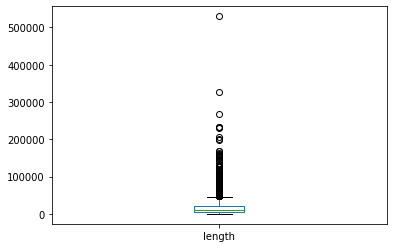

In [15]:
#take a look at trail lengths
df.length.plot(kind='box')
plt.show()

Almost all of the trails are under ~200000 meters (about 120 miles). Let's look at the outliers.

In [16]:
df.loc[df['name'] == 'Olympic Peninsula Loop Drive']

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,...,mountain-biking,trail-running,camping,fishing,snowshoeing,fly-fishing,backpacking,horseback-riding,rock-climbing,scenic-driving
2753,10040050,Olympic Peninsula Loop Drive,Olympic National Park,Olympia,Washington,United States,"{'lat': 47.02164, 'lng': -122.90689}",9.9486,529794.728,5096.8656,...,0,0,1,1,0,0,0,0,0,1


The biggest outlier is a trail in Washington which is a driving loop around the Olympic Peninsula that is over 300 miles long.

In [17]:
trail_count = df.loc[df['length'] > 14999].count()
trail_count['trail_id']

1166

While the scale goes well over 500,000 (meters), theres only 191 entries that are longer than 50,000; about 28 miles. Over a third of the 3059 trails are shorter than 15,000, equivelant to 9 miles. Looking at the other end of the spectrum there are some entries less than a tenth of a mile long, and even one listed at 0.

In [18]:
df_length = df.sort_values('length')
df_length.head(3)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,...,mountain-biking,trail-running,camping,fishing,snowshoeing,fly-fishing,backpacking,horseback-riding,rock-climbing,scenic-driving
2339,10333504,Newspaper Rock Trail,Canyonlands National Park,Monticello,Utah,United States,"{'lat': 37.98819, 'lng': -109.51825}",5.6874,0.000,0.0000,...,0,0,0,0,0,0,0,0,0,0
177,10258658,Walhalla Ruins,Grand Canyon National Park,North Rim,Arizona,United States,"{'lat': 36.13336, 'lng': -111.94147}",2.7978,160.934,0.0000,...,0,0,0,0,0,0,0,0,0,0
1139,10328659,Sunset View Trail,Black Canyon of the Gunnison National Park,Montrose,Colorado,United States,"{'lat': 38.56876, 'lng': -107.73352}",4.4651,160.934,0.9144,...,0,0,0,0,0,0,0,0,0,0


Newspaper Rock Trail has a length of 0. After looking it up it appears to be a large rock that doesn't really require any hiking at all (but is covered in Indian Petroglyphs (carvings)).

Let's take a look at elevation gain as it likely has a large factor in trail difficulty and in turn can affect trail choice by consumers.

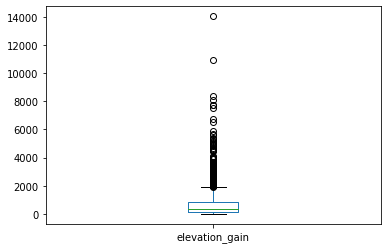

In [19]:
df.elevation_gain.plot(kind='box')
plt.show()

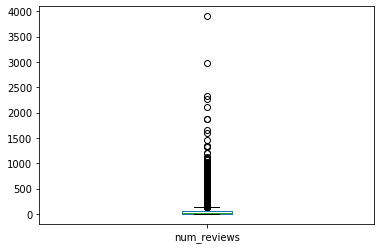

In [20]:
df.num_reviews.plot(kind='box')
plt.show()

This graph gives great insight into what trails are used the most (regardless of a positive or negative review). Let's take a look at number of reviews vs trail length.

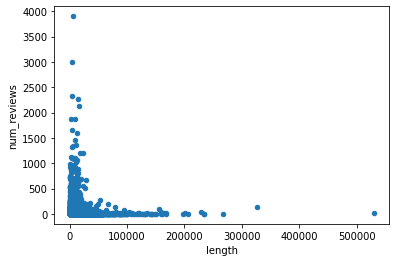

In [21]:
df.plot(kind='scatter', x='length', y='num_reviews')

This gives us a good look at trail usage even without the visitor_usage column.

In [22]:
df.loc[df['state_name'] == 'Hawaii']

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,...,mountain-biking,trail-running,camping,fishing,snowshoeing,fly-fishing,backpacking,horseback-riding,rock-climbing,scenic-driving
3264,10010442,Kilauea Iki Trail and Crater Rim Trail,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.41648, 'lng': -155.24294}",25.6723,4828.020,209.7024,...,0,0,0,0,0,0,0,0,0,0
3265,10266617,Kalapana Lava Viewing,Hawaii Volcanoes National Park,Pahoa,Hawaii,United States,"{'lat': 19.3557, 'lng': -154.98677}",11.3437,15288.730,196.9008,...,1,0,0,0,0,0,0,0,0,0
3266,10009483,Pu'u Huluhulu via Napau Crater Trail,Hawaii Volcanoes National Park,Pahoa,Hawaii,United States,"{'lat': 19.36539, 'lng': -155.2165}",10.4307,4023.350,94.7928,...,0,0,0,0,0,0,0,0,0,0
3267,10405832,Halema’uma’u Steam Bluff and Sulfur Banks,Hawaii Volcanoes National Park,Volcano,Hawaii,United States,"{'lat': 19.42902, 'lng': -155.25833}",9.9452,2092.142,24.9936,...,0,0,0,0,0,0,0,0,0,0
3268,10012920,Puu Loa Petroglyphs Trail,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.28898, 'lng': -155.12998}",9.7011,1931.208,25.9080,...,0,1,0,0,0,0,0,0,0,0
3269,10006503,Mauna Loa via Observatory Trail and Summit Trail,Hawaii Volcanoes National Park,Holualoa,Hawaii,United States,"{'lat': 19.53805, 'lng': -155.57531}",9.0037,20760.486,905.8656,...,0,0,0,0,0,0,0,0,0,0
3270,10013868,Devastation Trail to Puu Puai Overlook,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.4064, 'lng': -155.25293}",8.9927,1609.340,37.7952,...,0,0,0,0,0,0,0,0,0,0
3271,10176129,End of Chain of Craters Road Trail to Lava Viewing,Hawaii Volcanoes National Park,Kalapana,Hawaii,United States,"{'lat': 19.29555, 'lng': -155.09752}",8.9254,16576.202,130.7592,...,0,0,0,0,0,0,0,0,0,0
3273,10014100,Halema'uma'u Trail,Hawaii Volcanoes National Park,Pahoa,Hawaii,United States,"{'lat': 19.42964, 'lng': -155.25883}",7.7635,2735.878,130.7592,...,0,0,0,0,0,0,0,0,0,0
3274,10004712,Kipuka Puaulu Trail,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.43748, 'lng': -155.30324}",7.5378,1770.274,48.7680,...,1,0,0,0,0,0,0,0,0,0


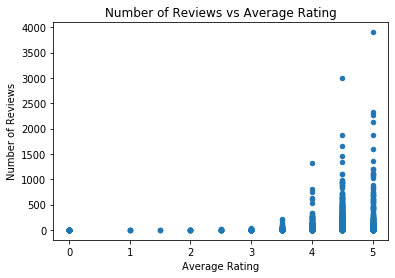

In [23]:
df.plot(kind='scatter', x='avg_rating', y='num_reviews')
plt.title('Number of Reviews vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Reviews')
plt.show()

Not surprisingly, the number of reviews increases with average ratings. When a trail receives higher ratings more people are interested in using that trail and it continues to become more and more popular, getting more reviews and good ratings.


Having seen how these three variables correlate with each other (positively), I'm interested to see how each feature / activity affects each one and if there are any differences with how they compare when looking at specific features.

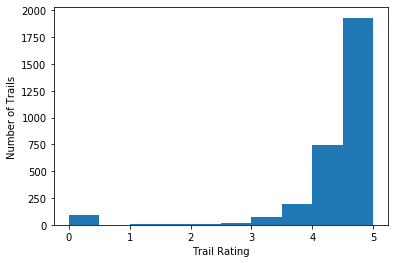

In [24]:
plt.hist(df.avg_rating)
plt.xlabel('Trail Rating')
plt.ylabel('Number of Trails')
plt.show()

The above histogram is interesting to me because it shows that users either love or strongly dislike a trail (or a strong feeling either way motivates them to rate a trail while if it was maybe "just okay" they dont bother giving it a rating).

# Inferential Statistical Analysis

In this sections we'll use frequentist statistical inference techniques to analyze the national park data, specifically ...

Null hypothesis: The average rating for California's trails are equal to those of Washington's

Alternative: The average ratings are not equal

Using an alpha of 5%, this two-tailed test will have a z-score of 1.96

In [25]:
#create variables to use for z testing
CA_mean = np.mean(df.loc[df['state_name'] == 'California'].avg_rating)
CA_sqrt_samp = np.sqrt(len(df.loc[df['state_name'] == 'California']))
WA_mean = np.mean(df.loc[df['state_name'] == 'Washington'].avg_rating)
WA_std = np.std(df.loc[df['state_name'] == 'Washington'].avg_rating)

In [26]:
#perform test
z_test1 = (CA_mean - WA_mean) / (WA_std / CA_sqrt_samp)
z_test1

-11.285611232414636

The calculated z-score is -11.29 which is far to the left of our distribution and strongly recommends the null hypothesis to be rejected. This means that the average rating for California's trails are not equal to those of Washington's.

In [27]:
#calculate margin of error
SE = WA_std / (CA_sqrt_samp)
MOE = 1.96 * SE
print(f"The Margin of Error (MOE) is: {MOE*100:.2f}%")

The Margin of Error (MOE) is: 4.41%


The margin of error (MOE) is 4.41% meaning that the calculated z statistic will be within 4.41 percentage points of the real population 95% of the time.

Next, let's run a hypothesis test on popularity and elevation gain. 

Null hypothesis: Elevation gain has no effect on trail popularity

Alternative: Elevation gain has a positive or negative effect on trail popularity

In [28]:
#create variables to use for t and p-value tests
ele_gain_mean = np.mean(df.elevation_gain)
ele_gain_std = np.std(df.elevation_gain)
trail_pop_mean = np.mean(df.popularity)
trail_pop_std = np.std(df.popularity)

In [29]:
#ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)
ttest_ind_from_stats(ele_gain_mean, ele_gain_std, 3060, trail_pop_mean, trail_pop_std, 3060, equal_var=True)

Ttest_indResult(statistic=39.687236954266744, pvalue=1.025685599972489e-306)

The t stat is 39.68 indicating that elevation gain has a strong effect on trail popularity. The p-value is far below the alpha (1.36e-306) supporting a rejection of the null hypothesis. A similar test and results can be ran with elevation gain and difficulty as well as shown below - as expected elevation gain has a significant affect on a trail's difficulty rating.

In [30]:
ttest_ind_from_stats(ele_gain_mean, ele_gain_std, 3060, np.mean(df.difficulty_rating), np.std(df.difficulty_rating), 3060, equal_var=True)

Ttest_indResult(statistic=40.06794036300369, pvalue=0.0)

# Correlation Heatmap 

In [31]:
#create dataframe without categories to use for a heatmap
df_no_cats = df[['popularity', 'visitor_usage', 'avg_rating','num_reviews', 
        'difficulty_rating', 'length', 'elevation_gain',
       'forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers', 'birding',
       'hiking', 'nature-trips', 'walking', 'mountain-biking', 'trail-running',
       'camping', 'fishing', 'snowshoeing', 'fly-fishing', 'backpacking',
       'horseback-riding', 'rock-climbing', 'scenic-driving']].fillna(0)

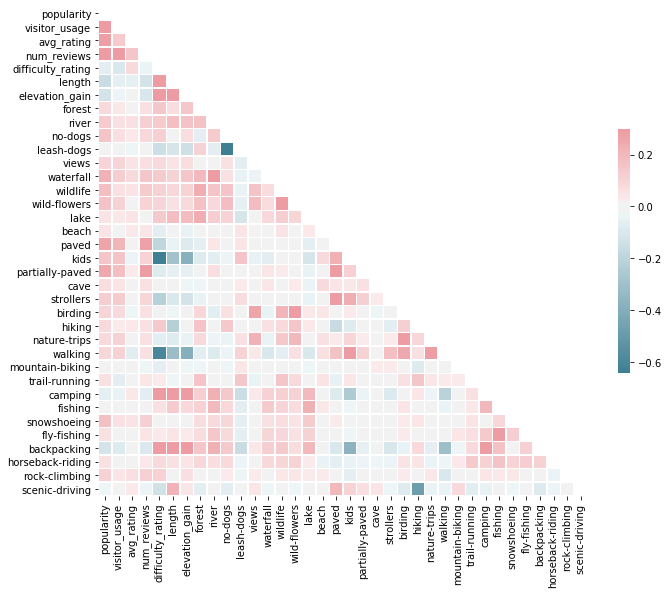

In [32]:
#use seaborns to make a heatmap of all numerical columns
corr = df_no_cats.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

This gives a fantastic quick view of how each variable affects the others. The first four columns are the main ones of interest, but there are many significant correlations that are noteworthy. Difficulty rating seems to have some of the strongest negative and positive correlations with other trail features.

# Machine Learning Models

The following cells are working to predict ratings of trails using various classification models. The average rating column will be converted from its 0-5 scale to a binary/boolean scale. '0' will represent the low ratings from 0 to 3.5 while '1' will represent the high ratings from 4 to 5.

In [33]:
#create dataframe for use with machine learning models
df_ml = df.copy()

#create separate columns for route types so they can be used in the prediction
df_ml['loop'] = df_ml['route_type'].apply(lambda x: 1 if 'loop' in x else 0)
df_ml['out&back'] = df_ml['route_type'].apply(lambda x: 1 if 'out and back' in x else 0)

#get rid of the route_type column
df_ml.drop('route_type', axis=1, inplace=True)

#convert avg_ratings column to boolean values for low (0) and high (1) ratings
df_ml['avg_rating_bi'] = df_ml['avg_rating'].apply(lambda x: 1 if x >= 4 else 0)

#create array to use as predictor columns in regression models
#taking out area_name, and state_name (may revisit with one-hot encoding)
X = df_ml.loc(axis=1)['trail_id',
       'popularity', 'length', 'elevation_gain',
       'difficulty_rating', 'visitor_usage',
       'num_reviews', 'forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers', 'birding',
       'hiking', 'nature-trips', 'walking', 'mountain-biking', 'trail-running',
       'camping', 'fishing', 'snowshoeing', 'fly-fishing', 'backpacking',
       'horseback-riding', 'rock-climbing', 'scenic-driving', 'loop', 'out&back'].values

#values to be predicted
y = df_ml.loc(axis=1)['avg_rating_bi'].values

In [34]:
#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5)

#data scaling to standardize values to normal distributions
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [35]:
#create function for showing model confusion matrix and metrics
 
#accuracy
def acc_metrics(y_test, y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))

### Quick overview of different models
Box and whisker plot of various classifiers' out of box accuracies

In [36]:
#loops through all models in a list to caclulate its out of box accuracy

#create list of models with names
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', LinearSVC()))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
msgs = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=5, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msgs.append(msg)

C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

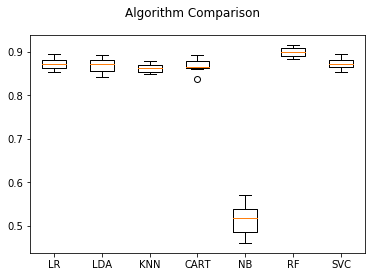

In [37]:
#plot model accuracies with a box plot
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Continue analysis with random forest, support vector machine, and logistic regression models.

### Random Forest Classifier Model

In [38]:
#initiate classifier, fit, predict, and print confusion matrix & metrics
rf_reg = RandomForestClassifier(random_state=5)
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)

acc_metrics(y_test, rf_y_pred)

#for later visualization
rf_cf = confusion_matrix(y_test, rf_y_pred)

[[ 59  57]
 [ 29 773]]
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       116
           1       0.93      0.96      0.95       802

    accuracy                           0.91       918
   macro avg       0.80      0.74      0.76       918
weighted avg       0.90      0.91      0.90       918

0.906318082788671


C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest accuracy = 90.63%

### Support Vector Machine Model Predictor

In [39]:
#initiate classifier, fit, predict, and print confusion matrix & metrics
svc = LinearSVC(random_state=5)
svc.fit(X_train, y_train)
svm_y_pred = svc.predict(X_test)

acc_metrics(y_test, svm_y_pred)

#for later visualization
svm_cf = confusion_matrix(y_test, svm_y_pred)

[[ 17  99]
 [ 13 789]]
              precision    recall  f1-score   support

           0       0.57      0.15      0.23       116
           1       0.89      0.98      0.93       802

    accuracy                           0.88       918
   macro avg       0.73      0.57      0.58       918
weighted avg       0.85      0.88      0.85       918

0.8779956427015251


Support vector machine accuracy = 87.8%

### Logistic Regression Model

In [40]:
log_reg = LogisticRegression(random_state=5)
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)

acc_metrics(y_test, lr_y_pred)

#for later visualization
lr_cf = confusion_matrix(y_test, lr_y_pred)

[[  3 113]
 [  5 797]]
              precision    recall  f1-score   support

           0       0.38      0.03      0.05       116
           1       0.88      0.99      0.93       802

    accuracy                           0.87       918
   macro avg       0.63      0.51      0.49       918
weighted avg       0.81      0.87      0.82       918

0.8714596949891068


C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression accuracy = 87.15%

## Tuning the parameters for models
Using Gridsearch CV find the optimal parameters for each model to find the best combination and most accurate.

### GridSearch for Random Forest Classifier 

In [41]:
#create arrays for ranges of parameters to attempt
forest = np.array([1, 10, 25, 50, 100, 200])
depth = np.array([1, 3, 5, 7, 10, 15])
crit = np.array(['gini', 'entropy'])

#initiate gridsearch
grid_rf = GridSearchCV(estimator= RandomForestClassifier(random_state=5), 
                       param_grid={'n_estimators': forest, 'max_depth': depth, 'criterion':crit}, cv=5)
#fit and print
grid_rf.fit(X_train, y_train)
print(grid_rf)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

#for later visualization
grid_rf_y_pred = grid_rf.best_estimator_.predict(X_test)
rfgrid_cf = confusion_matrix(y_test, grid_rf_y_pred)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=5,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

### GridSearch for Support Vector Machine

In [42]:
#create arrays for ranges of parameters to attempt
tolerance = np.array([.0001, .001, .01, .1, 1])
scale = np.array(range(1, 21))

#initiate gridsearch
grid_svm = GridSearchCV(estimator= LinearSVC(dual=False, random_state=5), 
                       param_grid={'C': scale, 'tol': tolerance}, cv=5)
#fit and print
grid_svm.fit(X_train, y_train)
print(grid_svm)
print(grid_svm.best_score_)
print(grid_svm.best_estimator_)

#for later visualization
grid_svm_y_pred = grid_svm.best_estimator_.predict(X_test)
svmgrid_cf = confusion_matrix(y_test, grid_svm_y_pred)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=5, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'tol': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8813638486688463
LinearSVC(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=5, tol=0.01, verbose=0)


### GridSearch for Logistic Regression

In [43]:
#this cell takes awhile to run

#create arrays for ranges of parameters to attempt
tolerance = np.array([.0001, .001, .01, .1, 1])
scale = np.array(range(1, 21))

#initiate gridsearch
grid_lr = GridSearchCV(estimator= LogisticRegression(penalty='l1', solver='liblinear', random_state=5), 
                       param_grid={'tol': tolerance, 'C': scale, 'intercept_scaling':scale}, cv=5)
#fit and print
grid_lr.fit(X_train, y_train)
print(grid_lr)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

#for later visualization
grid_lr_y_pred = grid_lr.best_estimator_.predict(X_test)
lrgrid_cf = confusion_matrix(y_test, grid_lr_y_pred)

C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Evan\Programming\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the num

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=5, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'intercept_scaling': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'tol': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.

# Conclusions
Compare confusion matrices and metrics of each model

#### Metrics and visualizations for out of box models

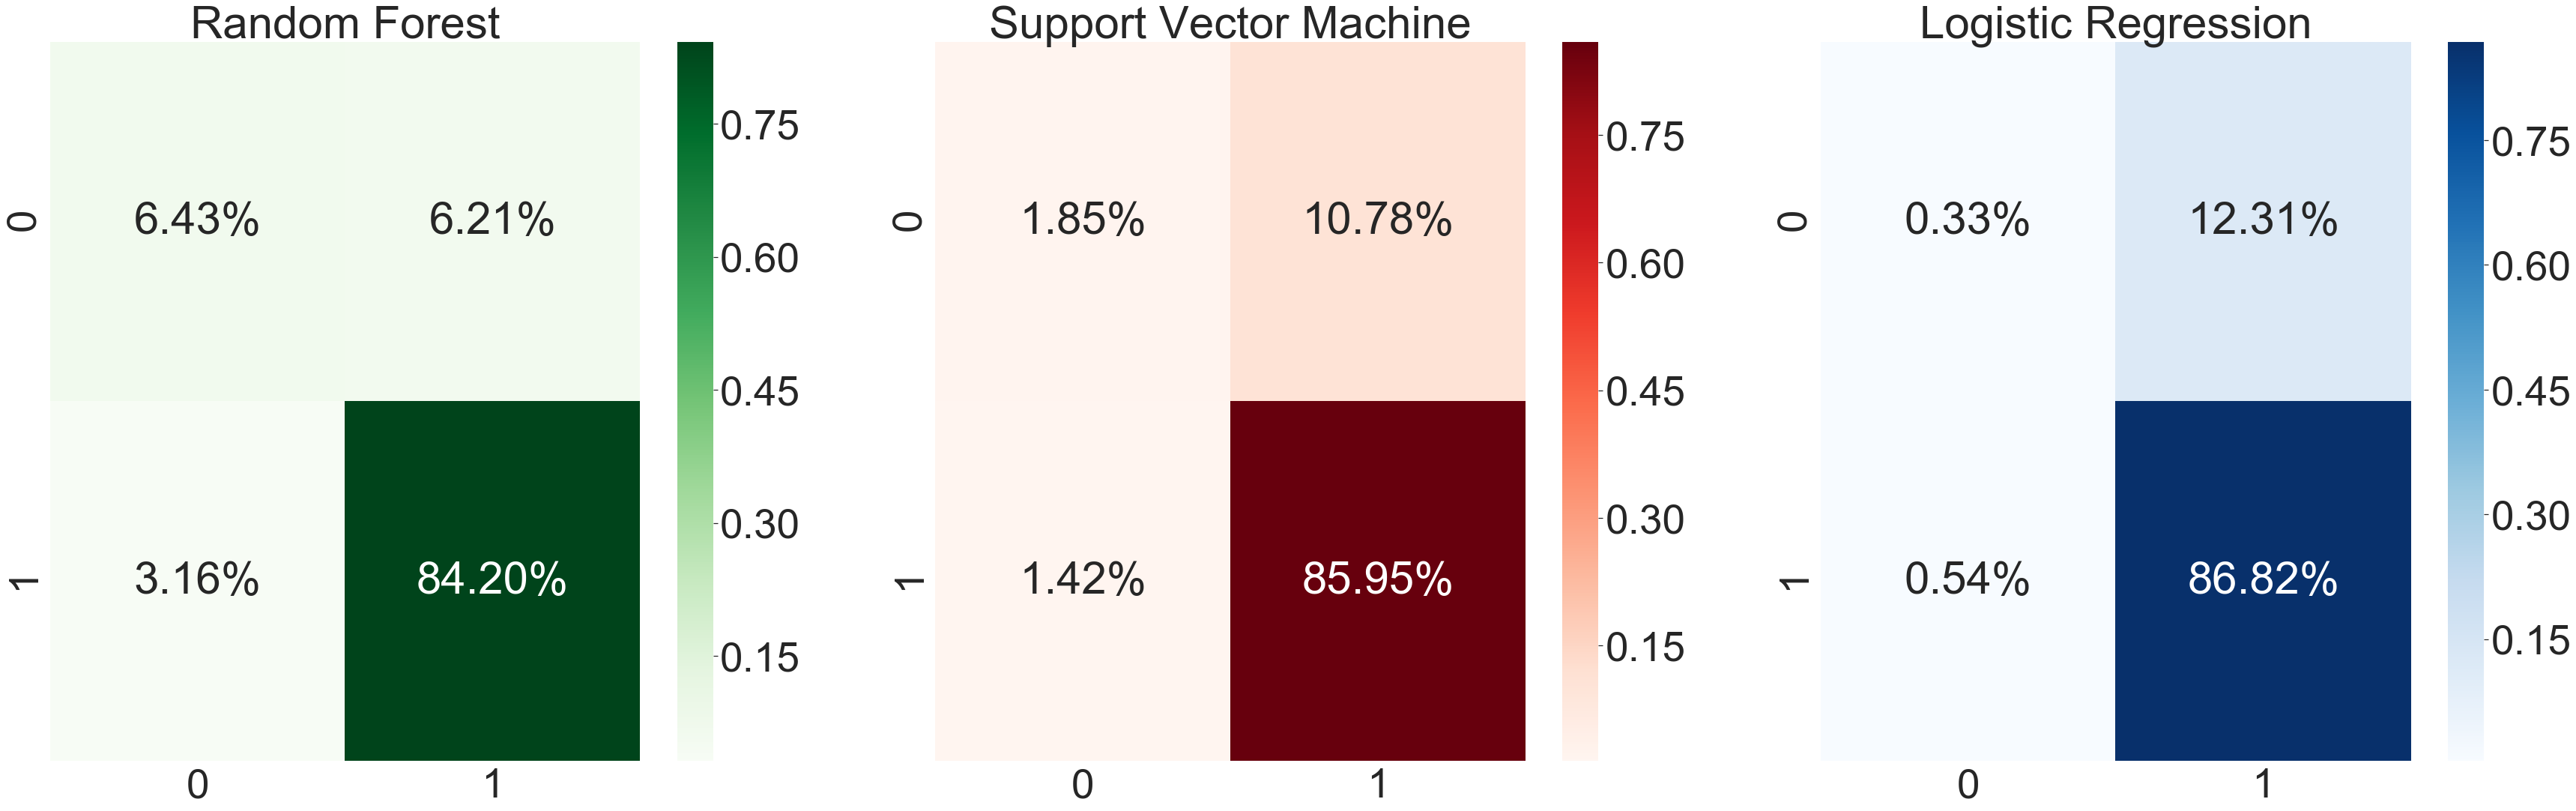

In [45]:
sns.set(font_scale=5)
fig = plt.figure(figsize = (60,60))

ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Random Forest')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Support Vector Machine')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Logistic Regression')

sns.heatmap(rf_cf/np.sum(rf_cf), ax=ax1, annot=True, fmt='.2%', cmap='Greens')
sns.heatmap(svm_cf/np.sum(svm_cf), ax=ax2, annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(lr_cf/np.sum(lr_cf), ax=ax3, annot=True, fmt='.2%', cmap='Blues')

plt.show()

In [44]:
#this cell is to create metric printouts for each model

#make list for each confusion matrix that will be used to loop through and calculate each metric
cfs = [rf_cf, svm_cf, lr_cf]
#initiate dictionary for the printouts to be added to
cfs_dict = {}

#for loop that creates a printout of metrics for each model
#downside is that the index for each model within the dictionary is its confusion matrix
#ie: to return the metric printout for the random forest model you type: print(cfs_dict['[[ 59  57]\n [ 29 773]]'])
for cf in cfs:
    accuracy  = np.trace(cf) / float(np.sum(cf))
    precision = cf[1,1] / sum(cf[:,1])
    recall    = cf[1,1] / sum(cf[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    
    cfs_dict["{0}".format(cf)]= f"Accuracy  = {accuracy*100:.4}\
                                \nPrecision = {precision*100:.4}\
                                \nRecall    = {recall*100:.4}\
                                \nF1 Score  = {f1_score*100:.4}"

#rename each set of metrics
rf_met = cfs_dict['[[ 59  57]\n [ 29 773]]']
svm_met = cfs_dict['[[ 17  99]\n [ 13 789]]']
lr_met = cfs_dict['[[  3 113]\n [  5 797]]']

In [48]:
print(f"Out of Box Algorithm Metrics as Percentages \n\nRandom Forest: \n{rf_met}\
       \n\nSupport Vector Machine: \n{svm_met}\n\nLogistic Regression: \n{lr_met}")

Out of Box Algorithm Metrics as Percentages 

Random Forest: 
Accuracy  = 90.63                                
Precision = 93.13                                
Recall    = 96.38                                
F1 Score  = 94.73       

Support Vector Machine: 
Accuracy  = 87.8                                
Precision = 88.85                                
Recall    = 98.38                                
F1 Score  = 93.37

Logistic Regression: 
Accuracy  = 87.15                                
Precision = 87.58                                
Recall    = 99.38                                
F1 Score  = 93.11


#### Metrics and visualizations for GridSearch CV optimized models


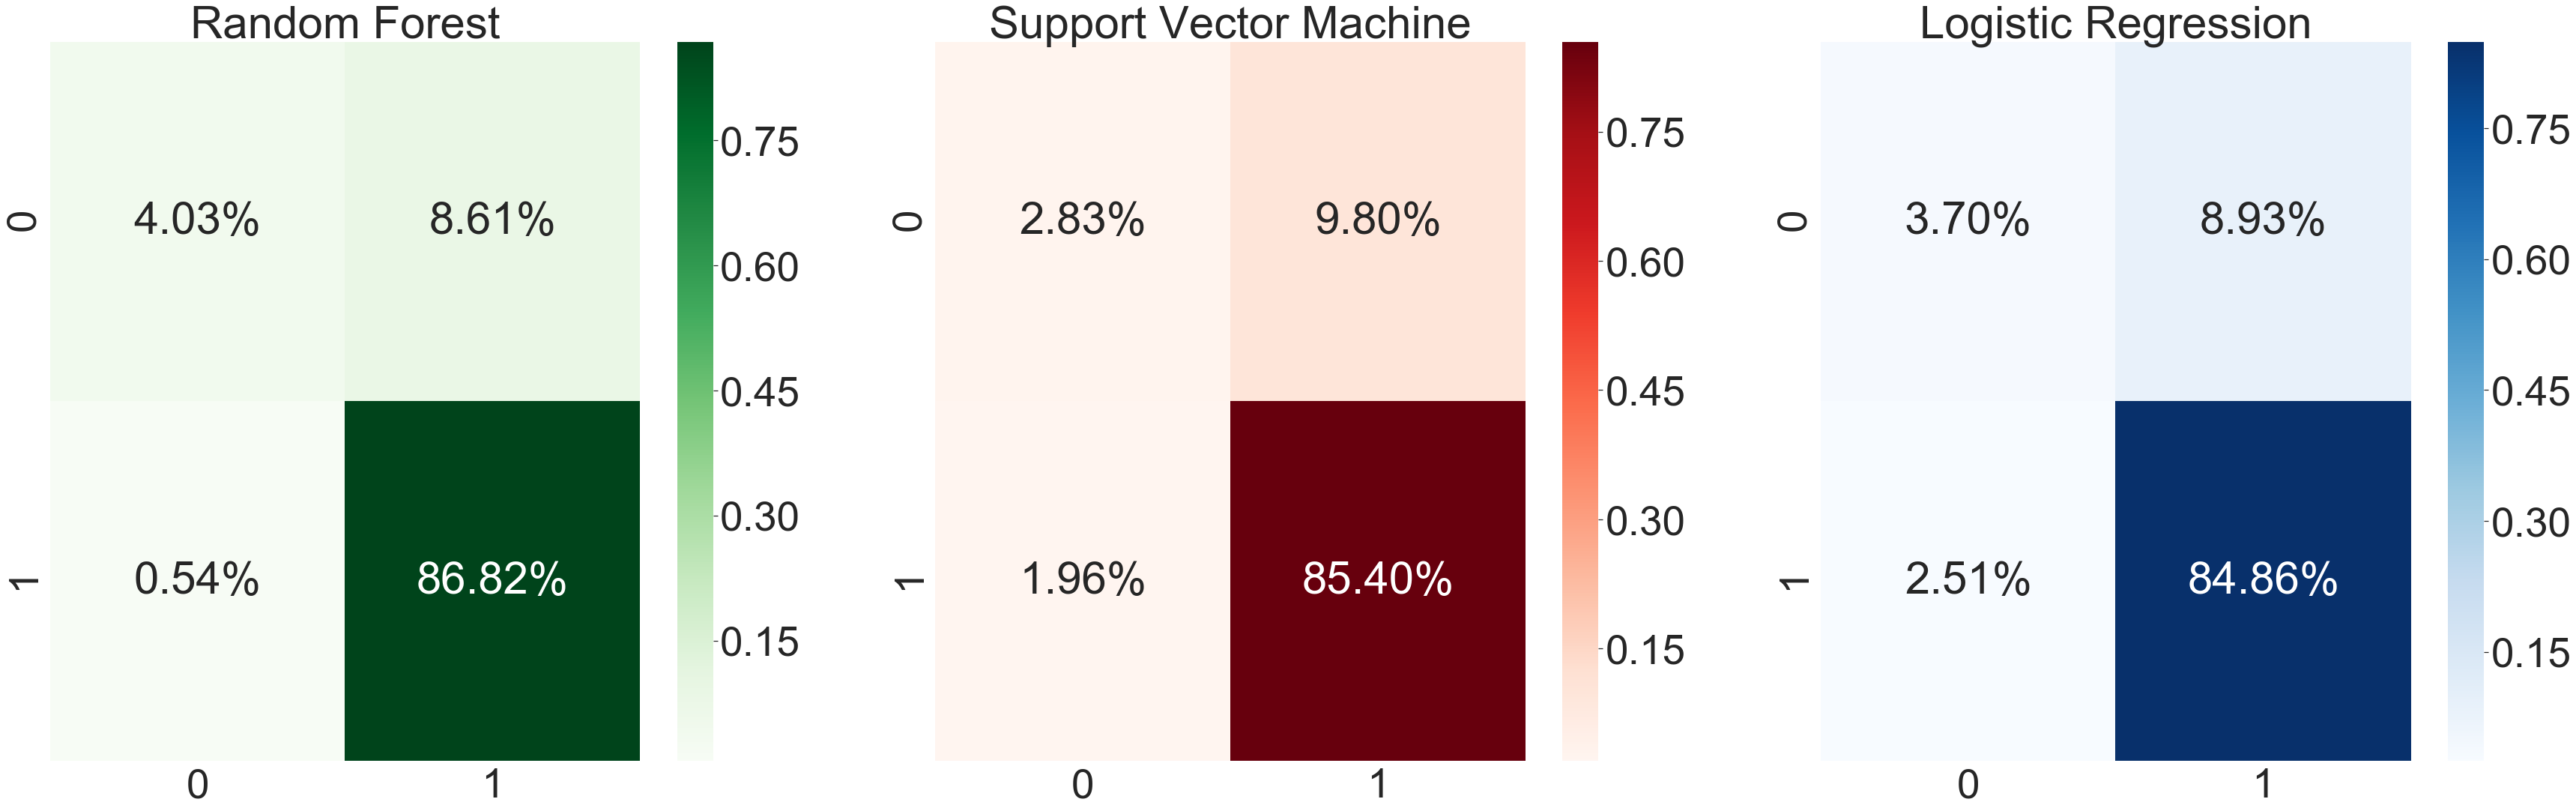

In [46]:
#confusion matrix heatmaps
sns.set(font_scale=5)
fig = plt.figure(figsize = (60,60))

ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Random Forest')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Support Vector Machine')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Logistic Regression')

sns.heatmap(rfgrid_cf/np.sum(rfgrid_cf), ax=ax1, annot=True, fmt='.2%', cmap='Greens')
sns.heatmap(svmgrid_cf/np.sum(svmgrid_cf), ax=ax2, annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(lrgrid_cf/np.sum(lrgrid_cf), ax=ax3, annot=True, fmt='.2%', cmap='Blues')

plt.show()

In [47]:
#make list for each confusion matrix that will be used to loop through and calculate each metric
cfs2 = [rfgrid_cf, svmgrid_cf, lrgrid_cf]
#initiate dictionary for the printouts to be added to
cfs2_dict = {}

#for loop that creates a printout of metrics for each model
#downside is that the index for each model within the dictionary is its confusion matrix
#ie: to return the metric printout for the random forest model you type: print(cfs_dict['[[ 59  57]\n [ 29 773]]'])
for cf in cfs2:
    accuracy  = np.trace(cf) / float(np.sum(cf))
    precision = cf[1,1] / sum(cf[:,1])
    recall    = cf[1,1] / sum(cf[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    
    cfs2_dict["{0}".format(cf)]= f"Accuracy  = {accuracy*100:.4}\
                                \nPrecision = {precision*100:.4}\
                                \nRecall    = {recall*100:.4}\
                                \nF1 Score  = {f1_score*100:.4}"

#rename each set of metrics
rfgrid_met = cfs2_dict['[[ 37  79]\n [  5 797]]']
svmgrid_met = cfs2_dict['[[ 26  90]\n [ 18 784]]']
lrgrid_met = cfs2_dict['[[ 34  82]\n [ 23 779]]']

In [49]:
print(f"GridSearch CV Optimized Algorithm Metrics as Percentages \n\nRandom Forest: \n{rfgrid_met}\
      \n\nSupport Vector Machine: \n{svmgrid_met}\n\nLogistic Regression: \n{lrgrid_met}")

GridSearch CV Optimized Algorithm Metrics as Percentages 

Random Forest: 
Accuracy  = 90.85                                
Precision = 90.98                                
Recall    = 99.38                                
F1 Score  = 94.99      

Support Vector Machine: 
Accuracy  = 88.24                                
Precision = 89.7                                
Recall    = 97.76                                
F1 Score  = 93.56

Logistic Regression: 
Accuracy  = 88.56                                
Precision = 90.48                                
Recall    = 97.13                                
F1 Score  = 93.69


## Closing Statements:

The biggest impact on average ratings:
- Negative: walking & length
- Positive: number of reviews and waterfalls

Almost every single metric was improved by implementing GridSearch CV. It is interesting to note how all true positive predictions decreased while true negatives increased by a larger amount, increasing overall prediction accuracies.
The random forest classifier model was determined to be the most accurate predictor of trail rating at 90.85%.

## Ideas for future additions:

- Train models to predict popularity, visitor usage, and number of reviews
- One-hot encode areas and state names to include in prediction models
- Gather data on elevation of trailheads to see how starting elevation affects the dependent variable
- Gather data on non-national park trails to compare & combine data